# House Price Prediction

### Table of Contents - 
1. Importing Libraries and dataset

2. Data Preprocessing <br>
2.1.1 Correlation matrix between SalePrice with other variables <br>
2.1.2 SalePrice correlation matrix <br>
2.1.3 Scatter plots between 'SalePrice' and correlated variables<br>
2.2 Missing Data<br>
2.2.1 Computing percent of missing Values<br>
2.2.2 Plotting the Proportion of Missing Values<br>
2.3 Outlier Detection<br>
2.3.1 Univariate Analysis<br>
2.3.2 Bivariate Analysis<br>

3. Analysing 'SalePrice'<br>
3.1 Checking the skewness for 'GrLivArea' and 'TotalBsmtSF'<br>

4. Modeling<br>
4.1 Linear Regression<br>
4.2 Lasso Regression<br>
4.3 Ridge Regression<br>
4.4 Random Forest<br>

5. Model Evaluation<br>
5.1 R-squared (R2)<br>
5.2 Root Mean Square Error (RMSE)<br>
5.3 Best Score<br>
5.4 Cross-Validation Score<br>

In [1]:
## import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading csv file
url = '/Users/adityaagarwal/Library/CloudStorage/OneDrive-NortheasternUniversity/Jupyter Notebook/Projects/Boston Housing Price Prediction/data/Housing_Prices.csv'
housing_data = pd.read_csv(url)

# display top 5 rows of the data
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Integer columns
housing_data.select_dtypes(include='int').columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Dropping the  'Id' colum as it's unnecessary for the prediction process.
housing_data.drop("Id", axis = 1, inplace = True)

In [7]:
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Data Processing
In data processing, our aim to understand the data and analyse it in order to gain insights from it.

### 1. Correlation matrix between SalePrice with other variables

<AxesSubplot:>

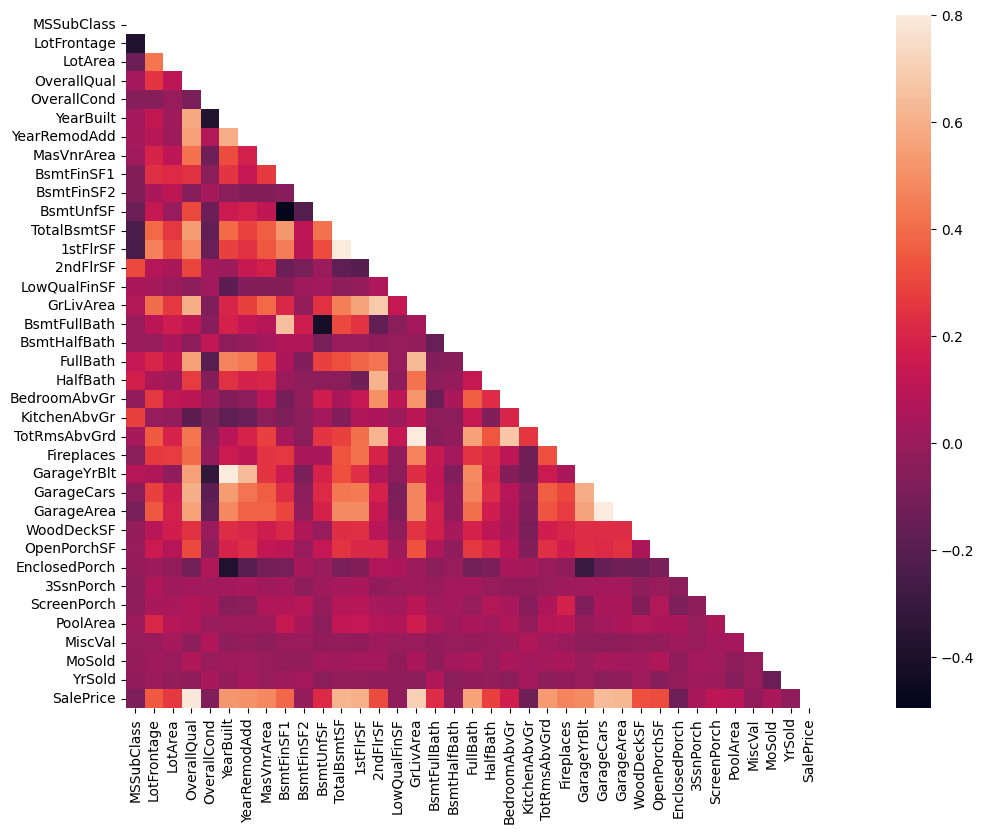

In [8]:
f, ax = plt.subplots(figsize=(20, 9))
mask = np.triu(np.ones_like(housing_data.corr()))
sns.heatmap(housing_data.corr(), vmax=.8, mask = mask, square = True)

#### SalePrice correlation matrix

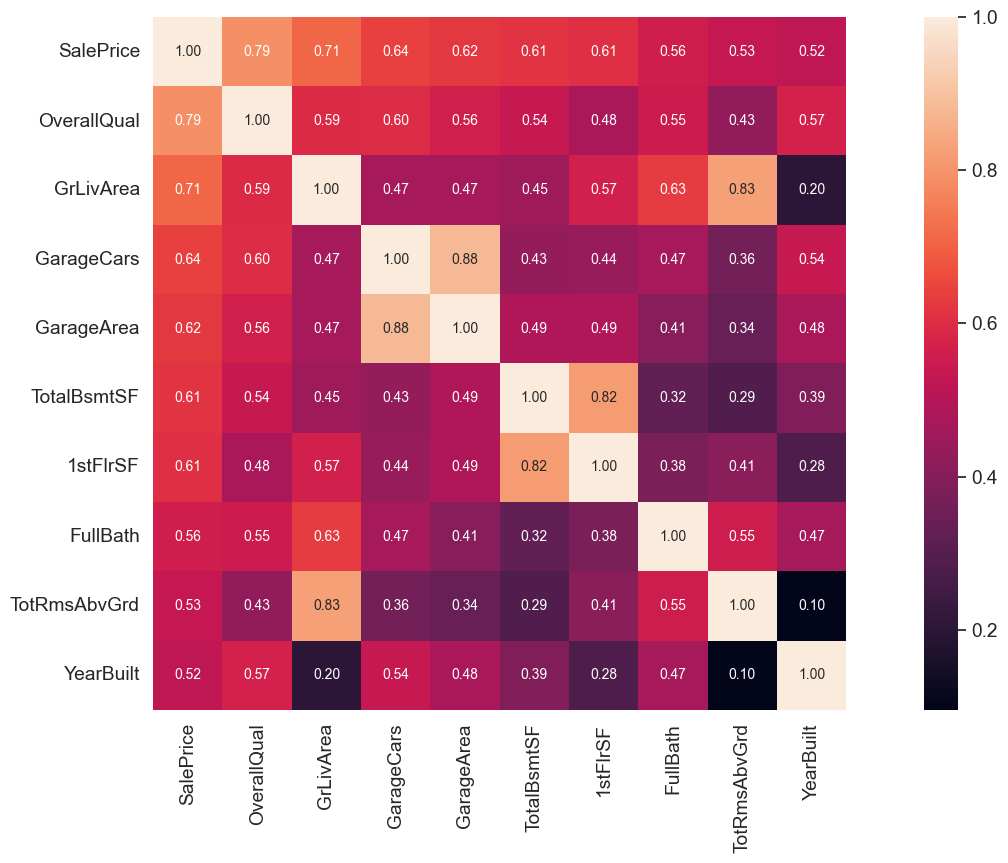

<Figure size 640x480 with 0 Axes>

In [8]:
k = 10 #number of variables for heatmap
cols = housing_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('Images/Heatmap.png')

According to the above heat maps:
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are also somewhat strongly correlated variables.
- 'YearBuilt' is slightly correlated with 'SalePrice'. This might be the indication of price inflation over the years.

#### Scatter plots between 'SalePrice' and correlated variables

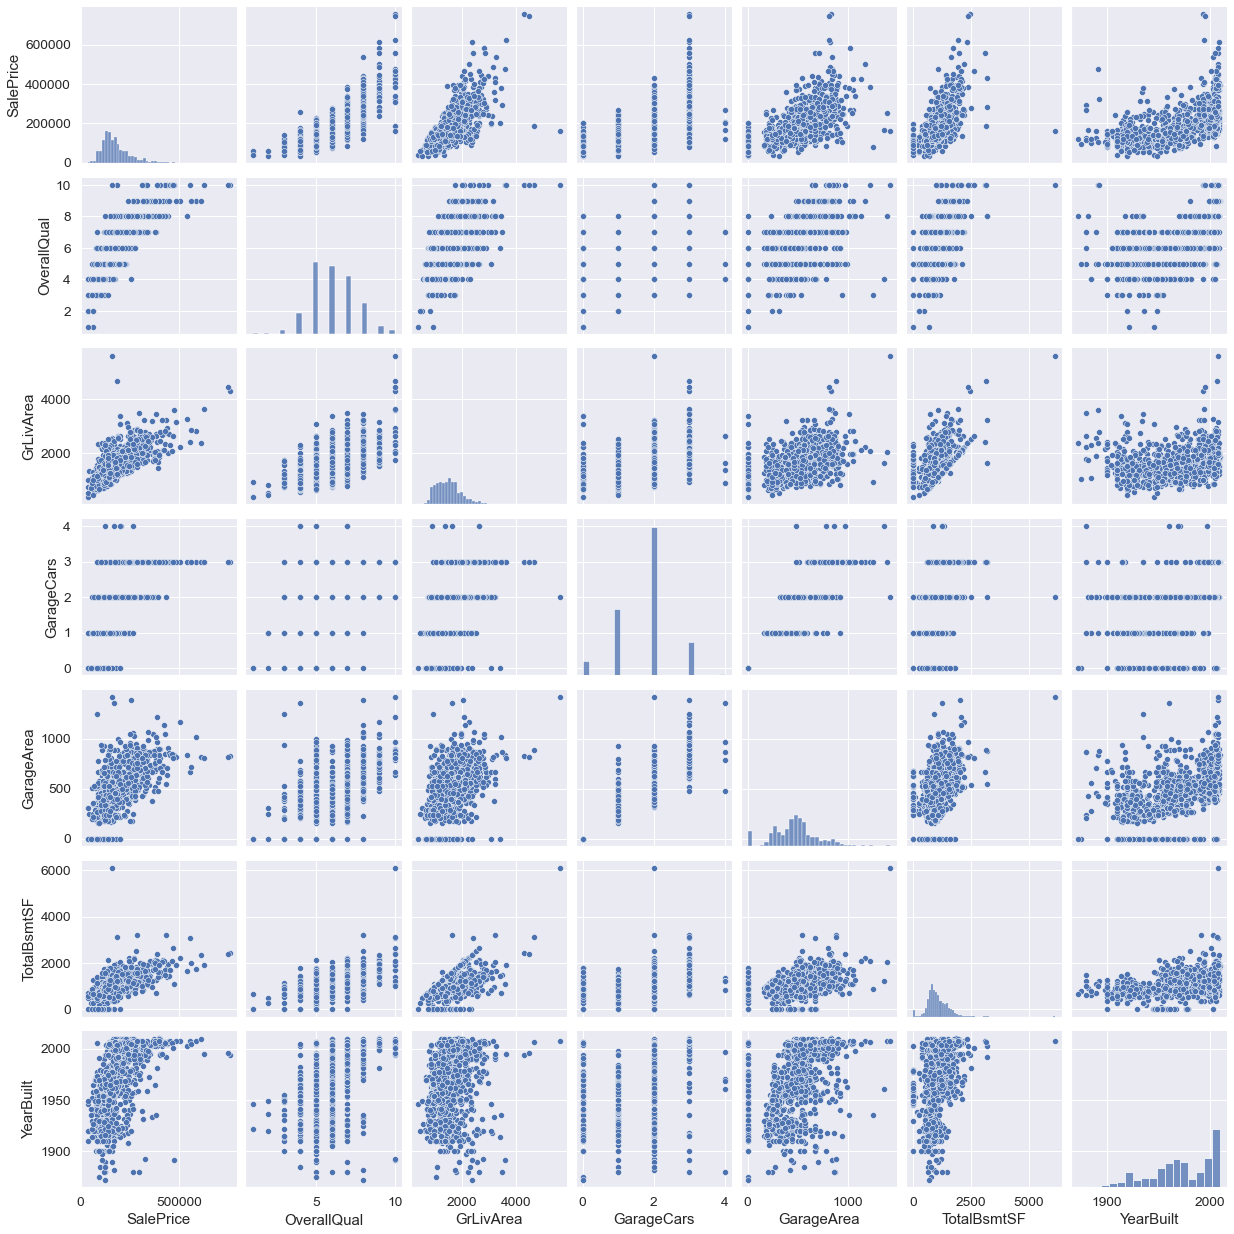

In [13]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(housing_data[cols], size = 2.5)
plt.show()

While considering 'TotalBsmtSF' and 'GrLiveArea' we could see that they are the highly correlated variables, and depicts a linear distribution, which almost acts like a border. 

This can make us assume that basement areas can be equal to the above ground living area, but it is not expected a basement area to be bigger than the above ground living area.

### 2. Missing Data

In [30]:
housing_data.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [31]:
housing_data.isnull().count()

MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
Street           1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 80, dtype: int64

#### Computing percent of missing Values

In [32]:
# computing the number of missing values - sum()
total = housing_data.isnull().sum().sort_values(ascending=False)
total_count = housing_data.isnull().count()
# computing percent of missing Values
percent = (housing_data.isnull().sum()/total_count).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [33]:
na = total[total==0].index.value_counts().sum()
na

61

In [34]:
na = total.drop(total[total==0].index)[:2]
na

PoolQC         1453
MiscFeature    1406
dtype: int64

#### Plotting the Proportion of Missing Values

Text(0.5, 1.0, 'Percent missing data by feature')

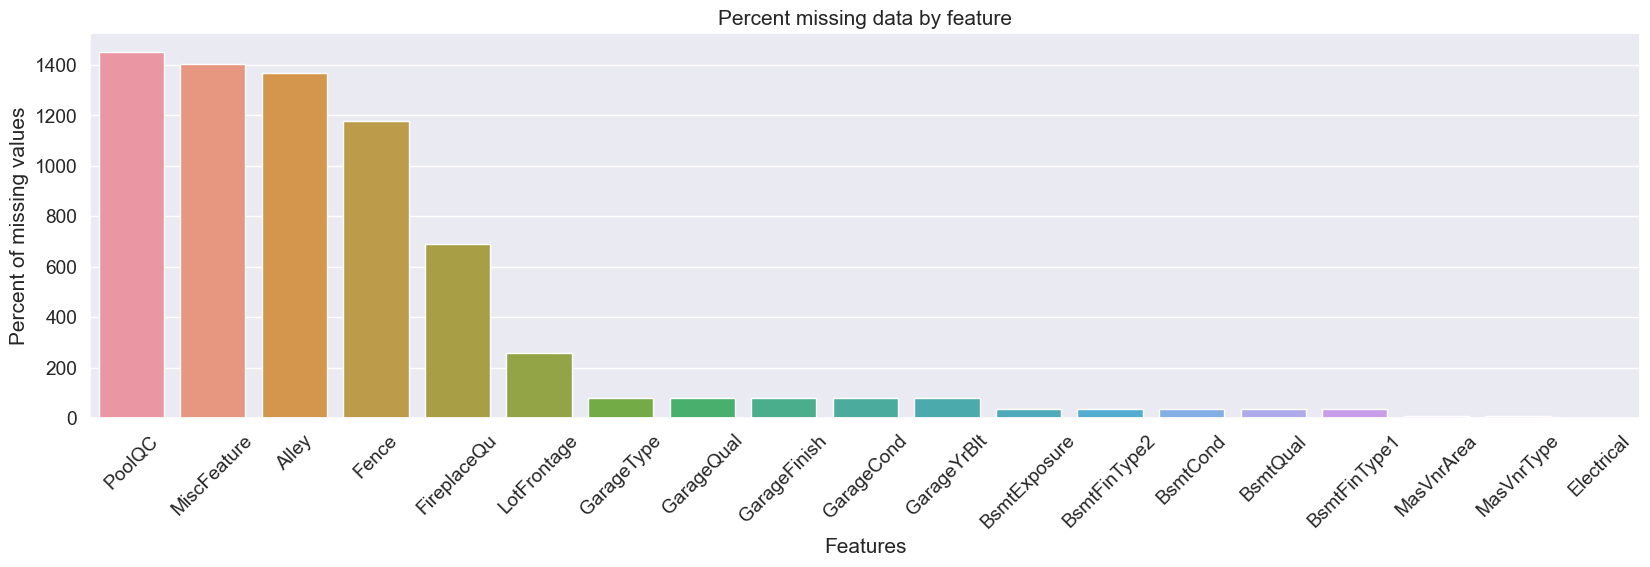

In [41]:
na = total.drop(total[total == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation='45')
sns.barplot(x=na.index, y=na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

- Deleting the variables having more than 10% missing values. They are: 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FirePlaceQu', 'LotFrontage', etc. These variables doesn't seem very important, so dropping them wouldn't lose us information.
- All the Garage variables have same number of missing values. Probably belonging to the same observations.
- Same goes for all the Basement variables.
- Neither 'MasVnrArea' nor 'MasVnrType' seem essential to consider for the SalePrice.
- 'Electrical' has just one missing observation so rather than deleting the variable, just deleting that particular observation.

In [42]:
housing_data = housing_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
housing_data = housing_data.drop(housing_data.loc[housing_data['Electrical'].isnull()].index)

In [43]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   int64 
 1   MSZoning       1459 non-null   object
 2   LotArea        1459 non-null   int64 
 3   Street         1459 non-null   object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   Utilities      1459 non-null   object
 7   LotConfig      1459 non-null   object
 8   LandSlope      1459 non-null   object
 9   Neighborhood   1459 non-null   object
 10  Condition1     1459 non-null   object
 11  Condition2     1459 non-null   object
 12  BldgType       1459 non-null   object
 13  HouseStyle     1459 non-null   object
 14  OverallQual    1459 non-null   int64 
 15  OverallCond    1459 non-null   int64 
 16  YearBuilt      1459 non-null   int64 
 17  YearRemodAdd   1459 non-null   int64 
 18  RoofStyle      1459 non-null

In [44]:
housing_data.isnull().sum().max()

0

In [45]:
housing_data.isnull().any()

MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 62, dtype: bool

### 3. Outliers

#### - Univariate Analysis
Standardizing data by converting data values to have mean of 0 and a standard deviation of 1

In [46]:
saleprice_scaled = StandardScaler().fit_transform(housing_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


- Low range values are not far from 0 which is good.
- High range values are far from 0, which isn't good but not alarming either.

#### - Bivariate analysis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

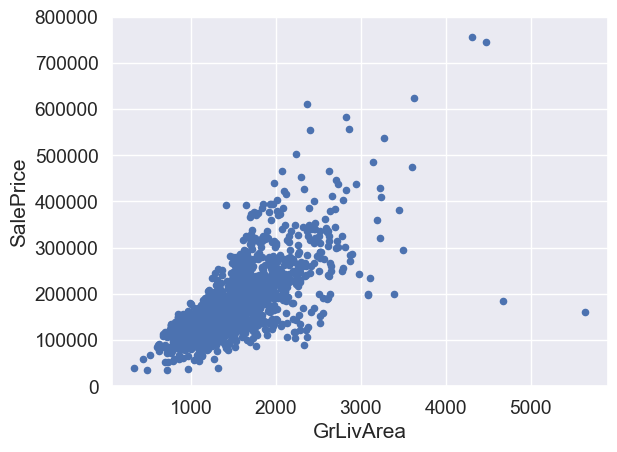

In [65]:
# SalePrice/GrLivArea
var = 'GrLivArea'
data = pd.concat([housing_data['SalePrice'], housing_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

- There are two values on the right with extremely high 'GrLivArea' and are different from the rest of the crowd. Therefore, can be defined as outliers and deleted.
- The two observations on the top of the plot are those >7 observations from the univariate analysis. Although, they look different but they seem to be following the trend. For that reason, we can keep them.

In [66]:
# Dropping outliers
housing_data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,...,0,0,0,480,0,1,2008,New,Partial,160000
523,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,10,2007,New,Partial,184750


In [67]:
housing_data = housing_data.drop(housing_data.index[1298])
housing_data = housing_data.drop(housing_data.index[524])

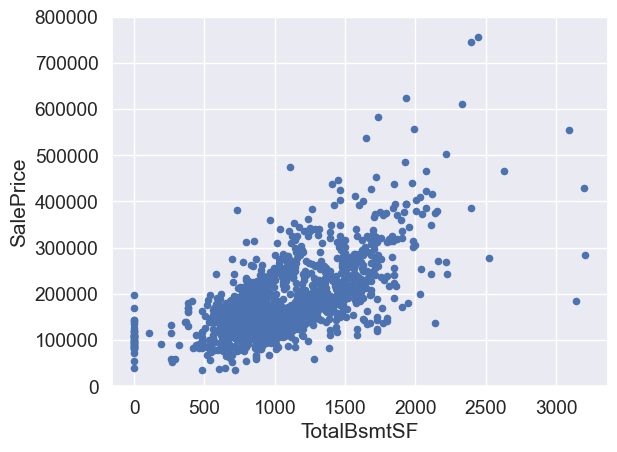

In [68]:
# SalePrice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([housing_data['SalePrice'], housing_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- Four points which are >3000 seem extrmely out of the crowd. We can remove them.

In [69]:
housing_data.sort_values(by = 'TotalBsmtSF', ascending = False)[:4]
housing_data = housing_data.drop(housing_data.index[332])
housing_data = housing_data.drop(housing_data.index[496])
housing_data = housing_data.drop(housing_data.index[523])
housing_data = housing_data.drop(housing_data.index[440])

### 4. Analysing 'SalePrice'
- It is the target variable for which we would be doing our predictive analysis and building models.

count      1453.000000
mean     180855.950447
std       79478.852805
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


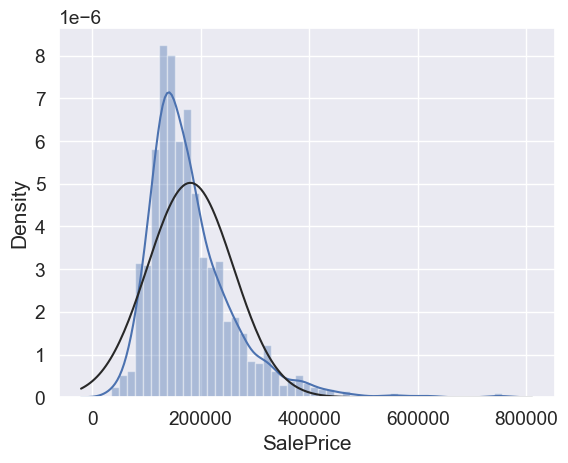

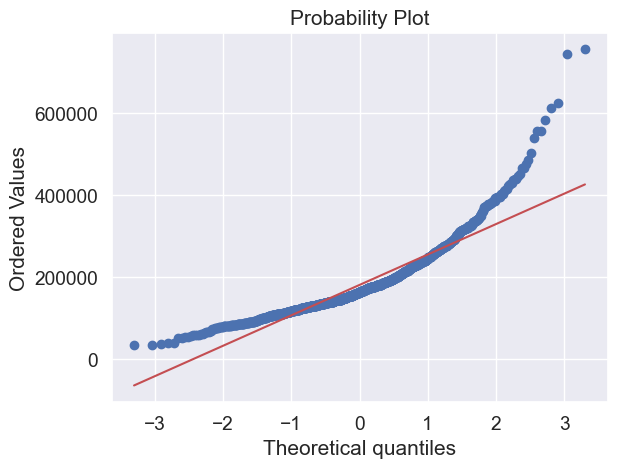

In [70]:
print(housing_data['SalePrice'].describe())
sns.distplot(housing_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing_data['SalePrice'], plot=plt)

- With the above information we can see that the SalePrice is right skewed or positive skewed and some outliers lies above ~500,000.
- Applying log transformation to normalise.

In [71]:
housing_data['SalePrice'] = np.log(housing_data['SalePrice'])

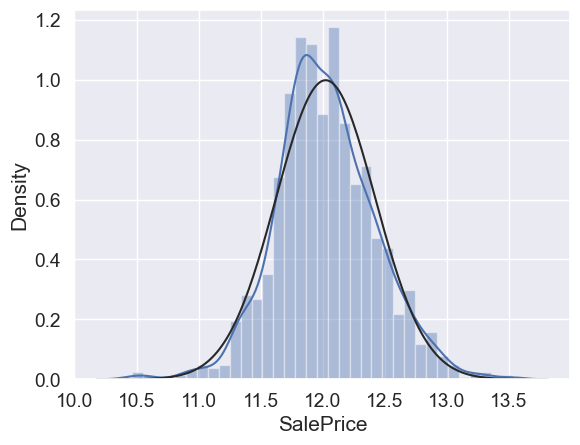

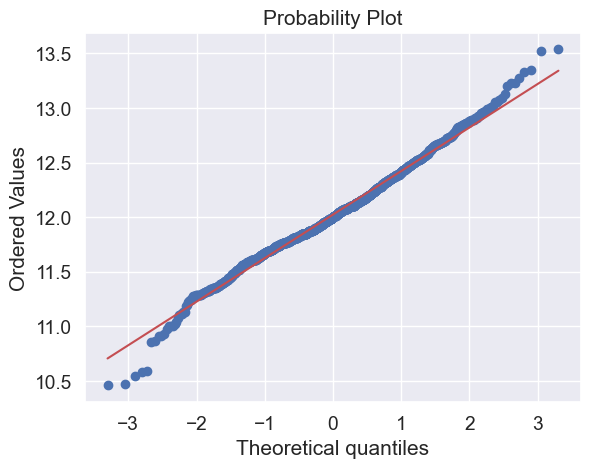

In [75]:
# Plotting after the transformation
sns.distplot(housing_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing_data['SalePrice'], plot=plt)

#### - Checking the skewness for 'GrLivArea' and 'TotalBsmtSF'

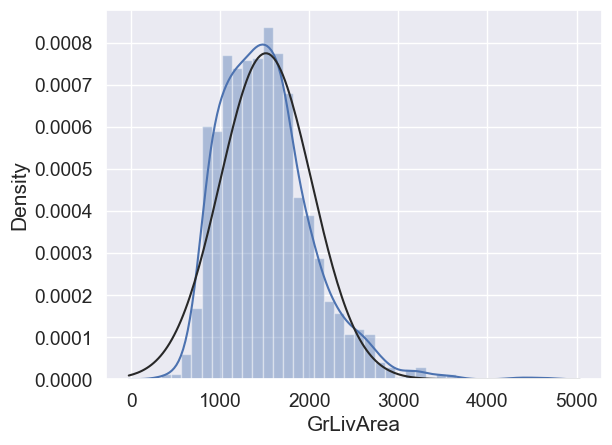

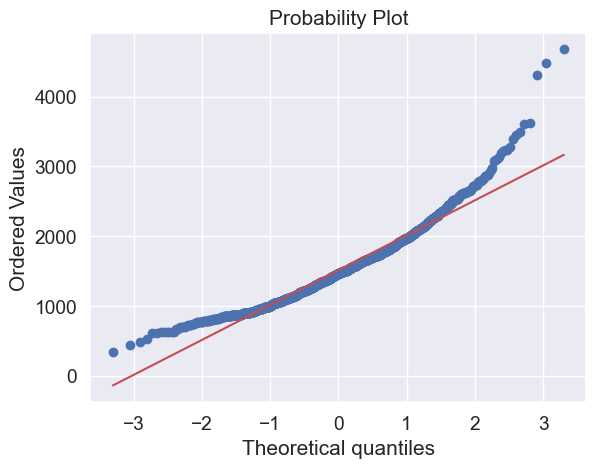

In [76]:
# 'GrLivArea'
sns.distplot(housing_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing_data['GrLivArea'], plot=plt)

- Slightly skewed to the right
- Applying log transormation for 'GrLivArea'

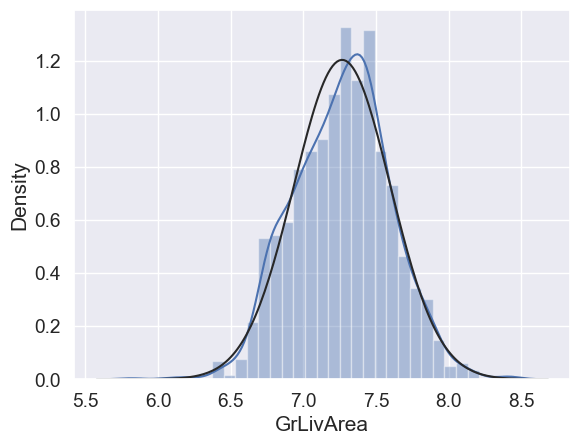

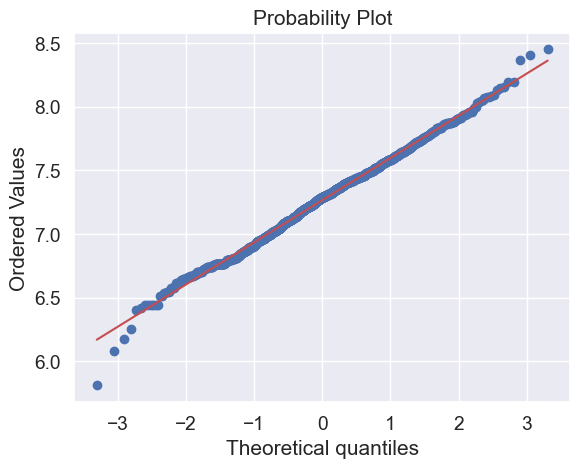

In [77]:
housing_data['GrLivArea'] = np.log(housing_data['GrLivArea'])

# Plotting after the transformation
sns.distplot(housing_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing_data['GrLivArea'], plot=plt)

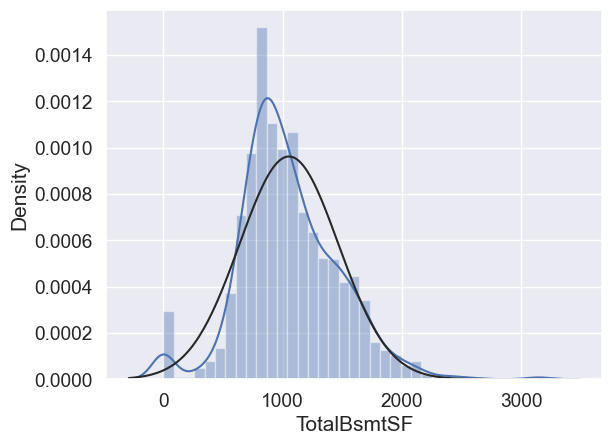

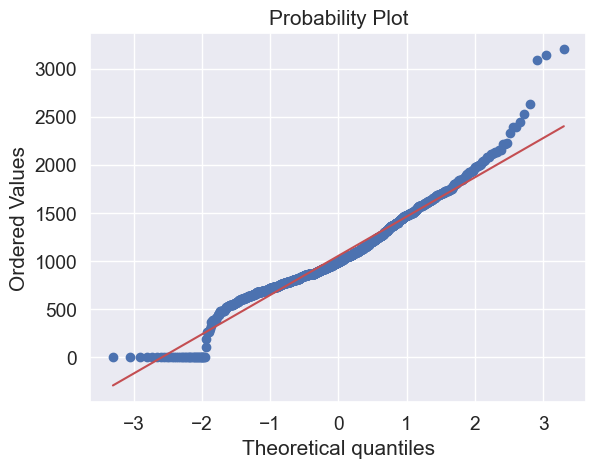

In [78]:
# 'TotalBsmtSF'
sns.distplot(housing_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing_data['TotalBsmtSF'], plot=plt)

- Slightly skewed to the right
- To apply log transormation for 'TotalBsmtSF' we'll create a new variable because a significant amount of observations are zero

In [79]:
# create a new variable (binary)
# if TotalBsmtSF > 0 it gets 1, for TotalBsmtSF is 0 it gets 0
housing_data['TotalBsmtSF_n'] = pd.Series(len(housing_data['TotalBsmtSF']), index=housing_data.index)
housing_data['TotalBsmtSF_n'] = 0 
housing_data.loc[housing_data['TotalBsmtSF']>0,'TotalBsmtSF_n'] = 1

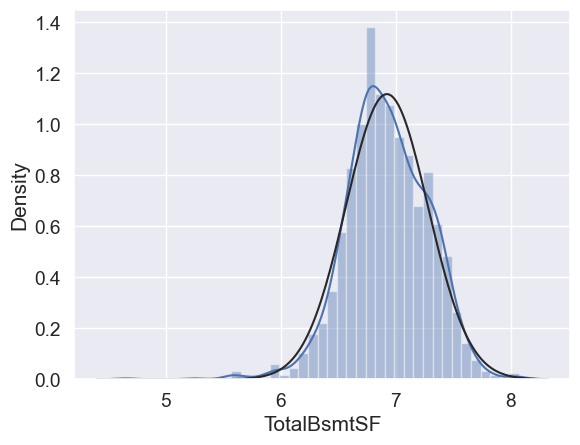

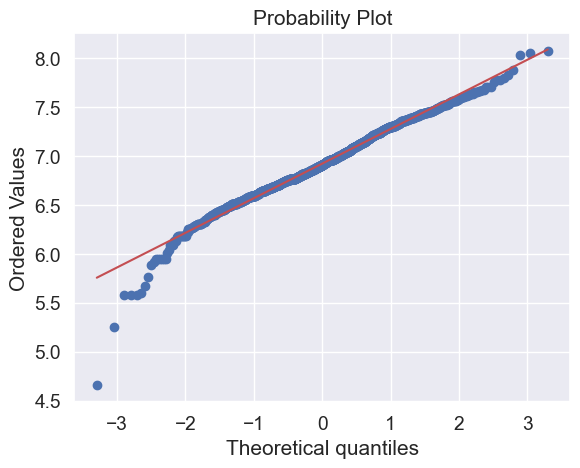

In [80]:
# log transformation
housing_data.loc[housing_data['TotalBsmtSF_n']==1,'TotalBsmtSF'] = np.log(housing_data['TotalBsmtSF'])

# Plotting after the transformation
sns.distplot(housing_data[housing_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing_data[housing_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

Now that we have done the data pre-processing we'll proceed with pridictive modeling.

### 5. Modeling

- Getting the target variable in y, and dropping it from dataframe.

In [81]:
y = housing_data['SalePrice']
housing_data.drop('SalePrice', axis=1, inplace=True)

- Creating dummy variables for the categorical variables.

In [82]:
housing_data_dummies = pd.get_dummies(housing_data)
housing_data_dummies.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,6.752270,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,7.140453,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,6.824374,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,6.628041,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,7.043160,...,0,0,0,1,0,0,0,0,1,0


In [83]:
housing_data_dummies.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=220)

 - Splitting the data into training and test set.

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(housing_data_dummies, y, test_size=0.2, random_state = 34)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(1162, 220) (1162,)
(291, 220) (291,)


- Splitting the training data into training and validation set

In [85]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state = 34)
print (X_training.shape, y_training.shape)
print (X_valid.shape, y_valid.shape)

(929, 220) (929,)
(233, 220) (233,)


#### Running the following models on training set:
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
    - Random Forest

#### To evaluate the performance of the models below scores are calculated for each model:
    - R-squared (R2)
    - Root Mean Square Error (RMSE)
    - Best Score
    - Cross Validation Score

In [91]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2 Score: {}'.format(r2_score(prediction, lables)))
    print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Returns Best Model, Best Score, R2, RMSE, Cross Validation values
def model(model, paremeters):    
    grid = GridSearchCV(model, paremeters, verbose=0, scoring="r2")
    grid.fit(X_training, y_training)
    print("Best Model: " + str(grid.best_estimator_))
    print("Best Score: " + str(grid.best_score_))
    model_v = grid.best_estimator_
    model_v.fit(X_training, y_training)
    model_v_pred = model_v.predict(X_valid)
    get_score(y_valid, model_v_pred)
    scores = cross_val_score(model_v, X_training, y_training, cv=10, scoring="r2")
    print("Cross Validation Score: " + str(np.mean(scores)))

##### 1. Linear Regression

In [92]:
lr = LinearRegression()
parameters_lr = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}

model(lr, parameters_lr)

Best Model: LinearRegression(normalize=False)
Best Score: 0.8689229541098887
R2 Score: 0.9208503546567672
RMSE Score: 0.10753925902309047
Cross Validation Score: 0.8760901970361716


##### 2. Lasso Regression

In [93]:
lasso = Lasso()
parameters_lasso = {"fit_intercept" : [True, False], "normalize" : [True, False], "precompute" : [True, False], "copy_X" : [True, False]}

model(lasso, parameters_lasso)

Best Model: Lasso(normalize=False, precompute=True)
Best Score: 0.783988468067186
R2 Score: 0.8045453685709703
RMSE Score: 0.1689917627245192
Cross Validation Score: 0.7832497839271945


##### 3. Ridge Regression

In [89]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}

model(ridge, parameters_ridge)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Model: Ridge(fit_intercept=False, normalize=True)
Best Score: 0.8893253070496847
R2 Score: 0.9301680346925484
RMSE Score: 0.10101123605067906
Cross Validation Score: 0.8929573618926744


##### 4. Random Forest

In [90]:
rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}

model(rf, paremeters_rf)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Model: RandomForestRegressor(criterion='mse', min_samples_split=10, n_estimators=20)
Best Score: 0.8517703881041042
R2 Score: 0.8433744944988522
RMSE Score: 0.1512773109235418
Cross Validation Score: 0.8470709073873832


#### On the basis of our evaluation parameters calculated for each model below are the observations:
    - R-squared is a statistical measure of how close the data are to the fitted regression line. The higher the R-squared, the better the model fits the data --> Ridge regression (0.9285)
    
    - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Lower the RMSE, the better the model fits the data --> Ridge regression (0.1021)
    
    - Higher the Best score the better the model fits the data --> Ridge regression (0.8857)
    
    - Higher Cross validation score means model performing well on the validation set, indicating that it may perform well on the unseen data(test set) --> Ridge regression (0.8927)

#### On the basis of above scores, running the Ridge regression model on the test data

In [94]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

ridge_e = grid_ridge.best_estimator_
ridge_e.fit(X_training, y_training)
ridge_e_pred = ridge_e.predict(X_test)
get_score(Y_test, ridge_e_pred)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
R2 Score: 0.8934593000980482
RMSE Score: 0.13051052432767749


### Conclusion

- Among all the models, Ridge Regression fits training set best.
- When we fit the Ridge Regression model on the test set, it can be seen that there is not much change in the R2 and RMSE values. This implies that our model doesn't overfit or underfit.